# build 3'UTR and 5' UTR RBP networks

- intra cell line similarity (dominant by RNA level)
- compare with STRING and known complexes

In [1]:
import pandas as pd
intron = pd.read_pickle('~/projects/intron.pickle')
exon = pd.read_pickle('~/projects/exon.pickle')

In [2]:
exon.head()

8,ID=exon:ENST00000342066.8:14,ID=exon:ENST00000327044.7:19,ID=exon:ENST00000327044.7:18,ID=exon:ENST00000327044.7:17,ID=exon:ENST00000327044.7:16,ID=exon:ENST00000327044.7:15,ID=exon:ENST00000327044.7:14,ID=exon:ENST00000327044.7:13,ID=exon:ENST00000327044.7:12,ID=exon:ENST00000327044.7:10,...,ID=exon:ENST00000541639.5:11,ID=exon:ENST00000541639.5:10,ID=exon:ENST00000541639.5:9,ID=exon:ENST00000541639.5:8,ID=exon:ENST00000541639.5:7,ID=exon:ENST00000541639.5:6,ID=exon:ENST00000541639.5:5,ID=exon:ENST00000541639.5:4,ID=exon:ENST00000541639.5:3,ID=exon:ENST00000541639.5:2
uID,,,,,,,,,,,,,,,,,,,,,
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# similarity between cell lines

In [3]:
eclip_bam = pd.read_csv('/home/hsher/projects/peak_calling/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

In [4]:
all_pairs = []
for name, g in eclip_bam.groupby(by = 'RBP'):
    pair = g['uID'].tolist()
    if len(pair) == 2:
        all_pairs.append(pair)

In [5]:
all_pairs

[['537', '543'],
 ['697', '708'],
 ['670', '762'],
 ['497', '508'],
 ['275', '292'],
 ['350', '492'],
 ['642', '681'],
 ['550', '595'],
 ['577', '589'],
 ['341', '383'],
 ['654', '682'],
 ['481', '575'],
 ['582', '631'],
 ['491', '722reseq2'],
 ['279', '297'],
 ['460', '649'],
 ['464', '723reseq1'],
 ['689', '694'],
 ['237', '713'],
 ['628', '645'],
 ['342', '384'],
 ['522', '651'],
 ['247', '283'],
 ['203', '699'],
 ['206', '326'],
 ['560', '678'],
 ['222', '224'],
 ['249', '281'],
 ['289', '321'],
 ['205', '220'],
 ['338', '493'],
 ['439', '755'],
 ['461', '558'],
 ['243', '298'],
 ['325', '387'],
 ['444', '592'],
 ['695', '716'],
 ['477', '566'],
 ['516', '553'],
 ['692', '719'],
 ['278', '291'],
 ['368', '696'],
 ['466', '478'],
 ['204', '676'],
 ['514', '552'],
 ['331', '494'],
 ['530', '540'],
 ['745', '746'],
 ['740', '744'],
 ['228', '507'],
 ['227', '256'],
 ['344', '445'],
 ['302', '316'],
 ['301', '312'],
 ['209', '376'],
 ['730', '738'],
 ['650', '663'],
 ['339', '388'],
 [

In [6]:
from sklearn.metrics import jaccard_similarity_score 
def cell_line_rep_similarity(df):
    '''
    input: pandas dataframe, row = RBP uID, columns = features
    output: intra cell-line replicate jaccard similarity
    '''
    intra_similarity = []

    for pair in all_pairs:
        if pair[0] in df.index and pair[1] in df.index:
            intra_similarity.append(jaccard_similarity_score(df.loc[pair[1]].values, df.loc[pair[0]].values))
    return intra_similarity

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Text(0.5, 1.0, 'intron cell line replicates')

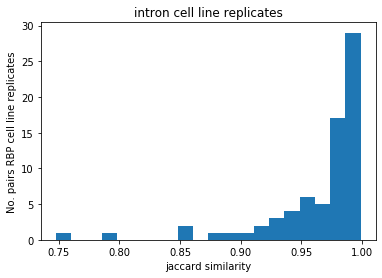

In [7]:
import matplotlib.pyplot as plt
plt.hist(cell_line_rep_similarity(intron), bins = 20)
plt.xlabel('jaccard similarity')
plt.ylabel('No. pairs RBP cell line replicates')
plt.title('intron cell line replicates')

Text(0.5, 1.0, 'exon cell line replicates')

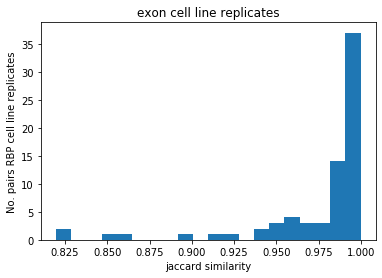

In [8]:
import matplotlib.pyplot as plt
plt.hist(cell_line_rep_similarity(exon), bins = 20)
plt.xlabel('jaccard similarity')
plt.ylabel('No. pairs RBP cell line replicates')
plt.title('exon cell line replicates')

# Calculate overall binding
since the two cell line replicates are quite similar, we shall merge the two entry

In [9]:
def merge_cell_line_replicates(df):
    merged_df = pd.DataFrame(columns = df.columns)
    for name, g in eclip_bam.groupby(by = 'RBP'):
        if len(set(g['uID']).intersection(df.index))== g.shape[0]:
            if g.shape[0] == 1: # only in 1 cell line
                merged_df = merged_df.append(df.loc[g['uID'].values], ignore_index = False)
            else:
                
                combined_peak = 1-(1-df.loc[g['uID'].iloc[0]]).multiply(1-df.loc[g['uID'].iloc[1]])
                combined_peak.name = g['uID'].iloc[0]
                #print(df.loc[g['uID']].append(combined_peak))
                merged_df = merged_df.append(combined_peak, ignore_index = False)
    return merged_df

In [10]:
exon_merged = merge_cell_line_replicates(exon)

Text(0.5, 0, 'No. RBP per exon')

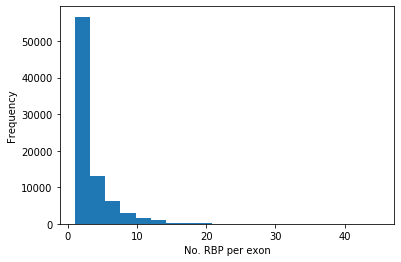

In [11]:
exon_merged.sum(axis = 0).plot.hist(bins = 20)# number of RBP binding per transcript
plt.xlabel('No. RBP per exon')

Text(0.5, 0, 'No. exon per RBP')

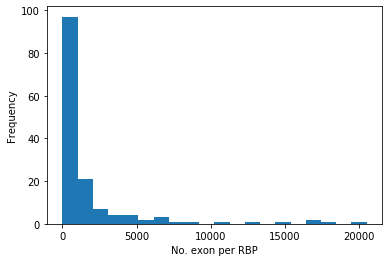

In [12]:
exon_merged.sum(axis = 1).plot.hist(bins = 20)# how many transcript one RBP binds to
plt.xlabel('No. exon per RBP')

In [13]:
intron_merged = merge_cell_line_replicates(intron)

Text(0.5, 0, 'No. RBP per intron')

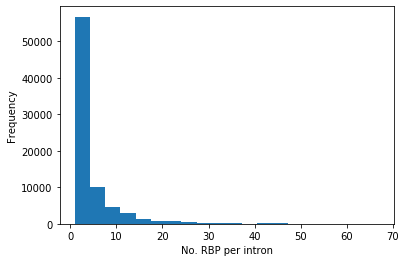

In [14]:
intron_merged.sum(axis = 0).plot.hist(bins = 20)# number of RBP binding per transcript
plt.xlabel('No. RBP per intron')

Text(0.5, 0, 'No. intron per RBP')

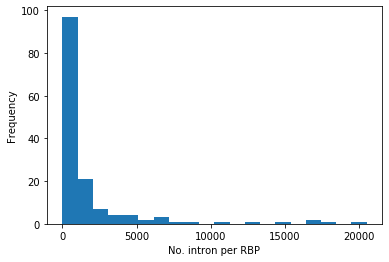

In [15]:
exon_merged.sum(axis = 1).plot.hist(bins = 20)# number of RBP binding per transcript
plt.xlabel('No. intron per RBP')

In [16]:
# top exon binding RBP
#eclip_bam.set_index('uID', inplace = True)
eclip_bam.loc[eclip_bam['uID'].isin(exon_merged.loc[exon_merged.sum(axis = 1) > 5000].index), 'RBP']

15      SF3B4
21      U2AF2
34      PRPF8
52     LIN28B
62      DDX3X
100     DDX24
106      PPIG
107     BUD13
129      YBX3
137    ZNF622
152     UCHL5
158     GRWD1
163    BCLAF1
174       AQR
Name: RBP, dtype: object

In [17]:
eclip_bam.loc[eclip_bam['uID'].isin(intron_merged.loc[intron_merged.sum(axis = 1) > 5000].index), 'RBP']

1      RBFOX2
3      HNRNPK
10     HNRNPM
15      SF3B4
21      U2AF2
33     CSTF2T
34      PRPF8
57     TARDBP
61      PCBP2
68      PTBP1
81      KHSRP
93        QKI
106      PPIG
107     BUD13
134    HNRNPL
142    EFTUD2
152     UCHL5
158     GRWD1
163    BCLAF1
174       AQR
215     PRPF4
Name: RBP, dtype: object

In [18]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
def jaccard_distribution(df):
    jac_sim = 1 - pairwise_distances(df.values, metric = "jaccard") # jaccard = disagree(does not include 0)
    rbp_name = eclip_bam.loc[eclip_bam['uID'].isin(df.index), 'RBP']
    print(rbp_name)
    jac_df = pd.DataFrame(jac_sim, index = rbp_name.values, columns = rbp_name.values)
    
    # to edgelist
    jac_df = jac_df.stack().reset_index()
    # rename the columns
    jac_df.columns = ['protein_one_name', 'protein_two_name', 'jaccard_similarity']

    # create a mask to identify rows with duplicate features as mentioned above
    mask_dups = (jac_df[['protein_one_name', 'protein_two_name']].apply(frozenset, axis=1).duplicated()) | (jac_df['protein_one_name']==jac_df['protein_two_name']) 

    # apply the mask to clean the correlation dataframe
    jac_df = jac_df[~mask_dups]
    
    
    return(jac_df)

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1735: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0        HNRNPC
1        RBFOX2
2       IGF2BP1
3        HNRNPK
4         SRSF7
         ...   
215       PRPF4
216       TIAL1
220       DDX21
221    APOBEC3C
222        SUB1
Name: RBP, Length: 147, dtype: object


(array([6.437e+03, 1.685e+03, 7.860e+02, 5.100e+02, 2.990e+02, 2.070e+02,
        1.520e+02, 1.250e+02, 9.600e+01, 6.000e+01, 6.100e+01, 4.500e+01,
        4.000e+01, 3.500e+01, 2.400e+01, 2.000e+01, 2.900e+01, 2.200e+01,
        1.300e+01, 6.000e+00, 1.200e+01, 1.200e+01, 5.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.00698389, 0.01396778, 0.02095167, 0.02793556,
        0.03491945, 0.04190335, 0.04888724, 0.05587113, 0.06285502,
        0.06983891, 0.0768228 , 0.08380669, 0.09079058, 0.09777447,
        0.10475836, 0.11174226, 0.11872615, 0.12571004, 0.13269393,
        0.13967782, 0.14666171, 0.1536456 , 0.16062949, 0.16761338,
        0.17459727, 0.18158116, 0.18

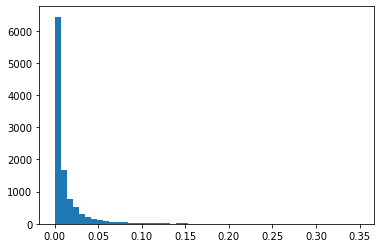

In [19]:
exon_jac = jaccard_distribution(exon_merged)
plt.hist(exon_jac['jaccard_similarity'], bins = 50)

/home/hsher/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1735: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0        HNRNPC
1        RBFOX2
2       IGF2BP1
3        HNRNPK
4         SRSF7
         ...   
215       PRPF4
216       TIAL1
220       DDX21
221    APOBEC3C
222        SUB1
Name: RBP, Length: 149, dtype: object


(array([4.819e+03, 1.704e+03, 1.136e+03, 8.870e+02, 6.590e+02, 4.660e+02,
        3.430e+02, 2.340e+02, 1.930e+02, 1.260e+02, 9.900e+01, 7.200e+01,
        6.000e+01, 5.000e+01, 3.100e+01, 3.200e+01, 2.300e+01, 2.400e+01,
        1.600e+01, 1.200e+01, 6.000e+00, 5.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        5.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.   , 0.012, 0.024, 0.036, 0.048, 0.06 , 0.072, 0.084, 0.096,
        0.108, 0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204,
        0.216, 0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  , 0.312,
        0.324, 0.336, 0.348, 0.36 , 0.372, 0.384, 0.396, 0.408, 0.42 ,
        0.432, 0.444, 0.456, 0.468, 0.48 , 0.492, 0.504, 0.516, 0.528,
        0.54 , 0.552,

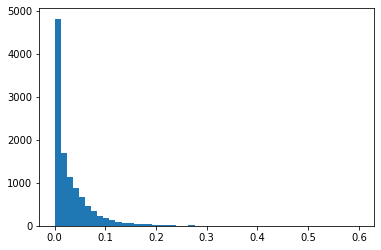

In [20]:
intron_jac= jaccard_distribution(intron_merged)
plt.hist(intron_jac['jaccard_similarity'], bins = 50)

# Correlate with string ppi

In [21]:
string = pd.read_pickle('~/projects/peak_calling/string_rbp_in.pickle')

In [22]:
string.head()

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,protein_one,protein_two
23473,9606.ENSP00000156109,9606.ENSP00000156471,binding,NaN,f,f,901,ENSP00000156109,ENSP00000156471
23474,9606.ENSP00000156109,9606.ENSP00000156471,catalysis,NaN,t,f,901,ENSP00000156109,ENSP00000156471
23475,9606.ENSP00000156109,9606.ENSP00000156471,catalysis,NaN,t,t,901,ENSP00000156109,ENSP00000156471
23476,9606.ENSP00000156109,9606.ENSP00000156471,reaction,NaN,f,f,901,ENSP00000156109,ENSP00000156471
23477,9606.ENSP00000156109,9606.ENSP00000156471,reaction,NaN,t,f,901,ENSP00000156109,ENSP00000156471


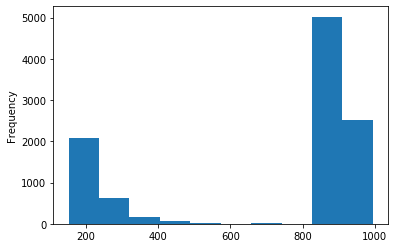

In [23]:
string['score'].plot.hist()

In [24]:
rbp_id = pd.read_pickle('~/projects/peak_calling/RBP_id.pickle')

In [25]:
all_protein = list(set(string['protein_one'].append(string['protein_two'])))
names = []
for p in all_protein:
    for id_set in rbp_id['esnp'].index:
        if p in rbp_id.loc[id_set, 'esnp']:
            names.append(id_set)

In [26]:
id_to_name = dict(zip(all_protein, names))

In [27]:
string['protein_one_name'] = string['protein_one'].map(id_to_name)
string['protein_two_name'] = string['protein_two'].map(id_to_name)
string['mapper'] = string[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)

In [28]:
string.shape

(10524, 12)

In [29]:
string.drop_duplicates('mapper', inplace = True)

In [30]:
intron_jac['mapper'] = intron_jac[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)
exon_jac['mapper'] = exon_jac[['protein_one_name', 'protein_two_name']].apply(frozenset, axis = 1)


In [31]:
string = string.merge(intron_jac, on = 'mapper', how = 'outer', suffixes = ('', '_INTRON'))
string = string.merge(exon_jac, on = 'mapper', how = 'outer', suffixes = ('', '_EXON'))

In [32]:
string.head()

,item_id_a,item_id_b,mode,action,is_directional,a_is_acting,score,protein_one,protein_two,protein_one_name,protein_two_name,mapper,protein_one_name_INTRON,protein_two_name_INTRON,jaccard_similarity,protein_one_name_EXON,protein_two_name_EXON,jaccard_similarity_EXON
0,9606.ENSP00000156109,9606.ENSP00000156471,binding,NaN,f,f,901.0,ENSP00000156109,ENSP00000156471,GPKOW,AQR,"(AQR, GPKOW)",GPKOW,AQR,0.108018,GPKOW,AQR,0.032787
1,9606.ENSP00000156109,9606.ENSP00000199814,binding,NaN,f,f,902.0,ENSP00000156109,ENSP00000199814,GPKOW,RBM22,"(RBM22, GPKOW)",RBM22,GPKOW,0.018849,RBM22,GPKOW,0.007874
2,9606.ENSP00000156109,9606.ENSP00000216727,binding,NaN,f,f,903.0,ENSP00000156109,ENSP00000216727,GPKOW,PABPN1,"(GPKOW, PABPN1)",GPKOW,PABPN1,0.019529,GPKOW,PABPN1,0.018182
3,9606.ENSP00000156109,9606.ENSP00000221419,binding,NaN,f,f,900.0,ENSP00000156109,ENSP00000221419,GPKOW,HNRNPL,"(GPKOW, HNRNPL)",GPKOW,HNRNPL,0.063001,GPKOW,HNRNPL,0.004373
4,9606.ENSP00000156109,9606.ENSP00000229390,binding,NaN,f,f,901.0,ENSP00000156109,ENSP00000229390,GPKOW,SRSF9,"(GPKOW, SRSF9)",SRSF9,GPKOW,0.023862,SRSF9,GPKOW,0.000201


In [33]:
string.shape

(11172, 18)

In [34]:
string['jaccard_similarity_INTRON'] = string['jaccard_similarity']

# interaction detected and not detected by STRING

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b7752d2ce50>,
      dtype=object)

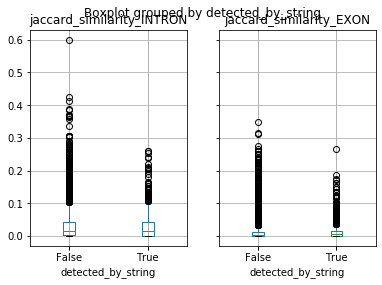

In [35]:
string['detected_by_string'] = string['score'].notnull()
string.boxplot(column = ['jaccard_similarity_INTRON', 'jaccard_similarity_EXON'],by = 'detected_by_string')

In [36]:
string.groupby(by = 'detected_by_string')['jaccard_similarity_INTRON', 'jaccard_similarity_EXON'].mean()

/home/hsher/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,jaccard_similarity_INTRON,jaccard_similarity_EXON
detected_by_string,,
False,0.031305,0.012612
True,0.029963,0.014622


## by percentile

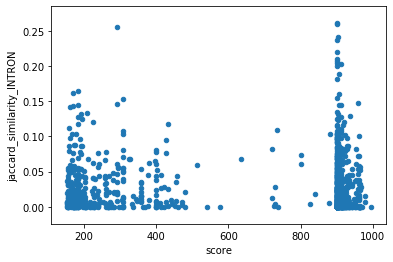

In [37]:
string.plot(kind = 'scatter', x = 'score', y = 'jaccard_similarity_INTRON')

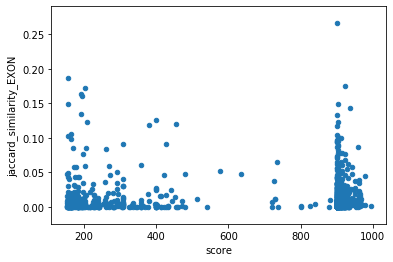

In [38]:
string.plot(kind = 'scatter', x = 'score', y = 'jaccard_similarity_EXON')

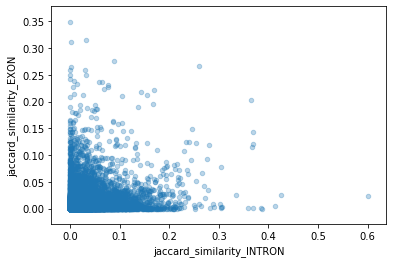

In [39]:
string.plot(kind = 'scatter', x = 'jaccard_similarity_INTRON', y = 'jaccard_similarity_EXON', alpha = 0.3)

In [40]:
string['protein_one'] = [list(i)[0] for i in string['mapper']]
string['protein_two'] = [list(i)[1] for i in string['mapper']]

# Do they exist in complex

In [41]:
corum_complex = pd.read_csv('~/projects/allComplexes.txt', sep = '\t')

In [42]:
all_uniprot = set()
_ = [all_uniprot.update(ids) for ids in rbp_id['uniprot.Swiss-Prot'] if type(ids) != float]

In [43]:
selected_complex_index = []
i = 0
for complex_set in corum_complex['subunits(UniProt IDs)'].str.split(';').apply(set):
    if len(complex_set.intersection(all_uniprot))>0:
        selected_complex_index.append(i)
    i+= 1


In [44]:
corum_complex = corum_complex.loc[selected_complex_index]

In [45]:
corum_complex['composition'] = corum_complex['subunits(Gene name)'].str.split(';')

## sample a random distribution

In [46]:
# normalize string
string['score'] = string['score'].fillna(0)/1000

In [47]:
# background_distribution
mean_list = []
all_protein = string['protein_one'].append(string['protein_two']).unique()
for n in range(500):
    
    random_10_protein = all_protein[np.random.random_integers(low = 0, high = len(all_protein)-1, size = 10)]
    sampled = string.loc[(string['protein_one'].isin(random_10_protein))&(string['protein_two'].isin(random_10_protein))]
    mean_list.append(sampled[['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON']].mean(axis = 0).values)

/home/hsher/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  


In [48]:
background_distribution = np.stack(mean_list)

Text(0.5, 0.98, 'background distibution for scores')

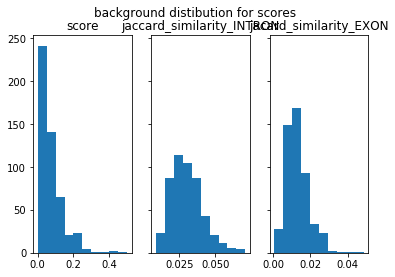

In [49]:
f, ax = plt.subplots(1,3, sharey = True)
i = 0
for score in ['score', 'jaccard_similarity_INTRON', 'jacard_similarity_EXON']:
    ax[i].hist(background_distribution[:,i])
    ax[i].set_title(score)
    i+= 1
plt.suptitle('background distibution for scores')

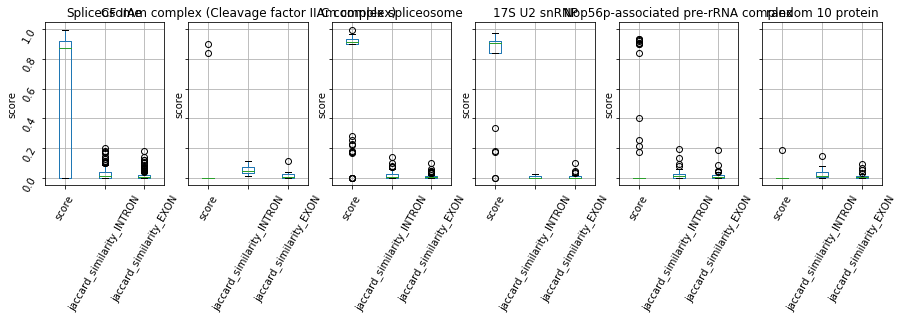

In [50]:
complex_score = pd.DataFrame(index = corum_complex.index, columns = ['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON'])
f,ax = plt.subplots(nrows = 1, ncols = corum_complex.shape[0]+1, figsize = (15,3), sharey = True)
i = 0
for c in corum_complex.index:
    
    complex_jaccard_score = string.loc[(string['protein_one'].isin(corum_complex.loc[c, 'composition']))&(string['protein_two'].isin(corum_complex.loc[c, 'composition']))]
    complex_jaccard_score = complex_jaccard_score[['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON']]
    complex_score.loc[c] = complex_jaccard_score.mean(axis = 0)
    complex_jaccard_score.boxplot(column = ['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON'], ax = ax[i])
    ax[i].set_title(corum_complex.loc[c, 'ComplexName'])
    ax[i].tick_params(labelrotation=60)
    ax[i].set_ylabel('score')
    i+=1
complex_jaccard_score = string.loc[(string['protein_one'].isin(random_10_protein))&(string['protein_two'].isin(random_10_protein))]
complex_jaccard_score.boxplot(column = ['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON'], ax = ax[i])    
ax[i].set_title('random 10 protein')
ax[i].tick_params(labelrotation=60)


In [51]:
# statistical significance
complex_score

,score,jaccard_similarity_INTRON,jaccard_similarity_EXON
314,0.478467,0.0275072,0.0164776
1061,0.1743,0.0536539,0.0218576
1101,0.812912,0.0182949,0.0106902
1781,0.731619,0.00488827,0.0142863
2067,0.139727,0.0225391,0.0138446


In [52]:
np.percentile(background_distribution[:,0], 95)

0.20626888888888895

In [53]:
np.percentile(background_distribution[:,1], 95)

0.049591640279031395

In [54]:
np.percentile(background_distribution[:,2], 95)

0.024868111576541896

In [60]:
string[['score', 'jaccard_similarity_INTRON', 'jaccard_similarity_EXON', 'protein_one', 'protein_two']].to_csv('~/projects/network/intron_exon_network')